In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import sys
!python -m pip install xgboost

You should consider upgrading via the 'c:\Users\Ammar El-Saeed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
csv_data = pd.read_csv('fma-rock-vs-hiphop.csv')
json_data = pd.read_json('echonest-metrics.json')
print(csv_data.columns)
print(json_data.columns)

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')
Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')


In [12]:
song_data = pd.merge(csv_data, json_data, on='track_id')
song_data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,tags,title,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,[],Hundred-Year Flood,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],...,[],Squares And Circles,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],...,[],Maps of the Stars Homes,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,192000,0,James Squeaky,2008-11-26 01:46:02,2006-01-01 00:00:00,144,1,Rock,[25],...,[],Boss of Goth,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,192000,0,NaN,2008-11-26 01:46:05,2006-10-07 00:00:00,181,0,Rock,[25],...,[],Industry Standard Massacre,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


# Data cleaning and Visualization

In [15]:
# count missing values in each column
song_data.isnull().sum()/(song_data.shape[0])*100

track_id             0.000000
bit_rate             0.000000
comments             0.000000
composer            97.792586
date_created         0.000000
date_recorded       74.302374
duration             0.000000
favorites            0.000000
genre_top            0.000000
genres               0.000000
genres_all           0.000000
information         93.044565
interest             0.000000
language_code       45.876718
license              0.270721
listens              0.000000
lyricist            99.729279
number               0.000000
publisher           99.437734
tags                 0.000000
title                0.000000
acousticness         0.000000
danceability         0.000000
energy               0.000000
instrumentalness     0.000000
liveness             0.000000
speechiness          0.000000
tempo                0.000000
valence              0.000000
dtype: float64

In [19]:
# Drop Nan from all columns with 45% or higher Nan values
nan_value_percent = song_data.isnull().sum()/(song_data.shape[0])*100
cols_to_Drop = nan_value_percent[[row>45 for row in nan_value_percent]].index
song_data_dropna = song_data.drop(labels = cols_to_Drop, axis=1)
song_data_dropna.head()

,track_id,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,...,tags,title,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,256000,0,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,...,[],Hundred-Year Flood,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,256000,0,2008-11-26 01:45:04,319,1,Rock,[26],"[26, 12]",242,...,[],Squares And Circles,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,192000,0,2008-11-26 01:45:10,756,1,Rock,[26],"[26, 12]",268,...,[],Maps of the Stars Homes,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,192000,0,2008-11-26 01:46:02,144,1,Rock,[25],"[25, 12]",815,...,[],Boss of Goth,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,192000,0,2008-11-26 01:46:05,181,0,Rock,[25],"[25, 12]",468,...,[],Industry Standard Massacre,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


now the only column with missing values is license column (0.27%), turns out its a categorical column with 44 unique labels, so dropping it might be
the better option, rather than one hot encoding.

In [23]:

print(song_data_dropna.license.nunique())

song_data_dropna = song_data_dropna.drop('license', axis=1)

44


In [34]:
# Dealing with categorical columns
categorical_cols = [dtype=='object' for dtype in song_data_dropna.dtypes]
song_data_categorical = song_data_dropna[song_data_dropna.columns[categorical_cols]] 
print(song_data_categorical.nunique())

date_created    3875
genre_top          2
genres           114
genres_all        92
tags              66
title           4638
dtype: int64


In [58]:
song_data_categorical.head()


,date_created,genre_top,genres,genres_all,tags,title
0,2008-11-26 01:45:00,Rock,[26],"[26, 12]",[],Hundred-Year Flood
1,2008-11-26 01:45:04,Rock,[26],"[26, 12]",[],Squares And Circles
2,2008-11-26 01:45:10,Rock,[26],"[26, 12]",[],Maps of the Stars Homes
3,2008-11-26 01:46:02,Rock,[25],"[25, 12]",[],Boss of Goth
4,2008-11-26 01:46:05,Rock,[25],"[25, 12]",[],Industry Standard Massacre


since we cannot think of features that can be derived from title and date created that can help in song genre classification, we drop these columns. 
genre top is our target column, we apply ordinal encoding on it. 
genres,genres_all, and tag columns are unknown. we should consult the author about them.

In [60]:
song_data_categorical.genre_top.value_counts()


Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [55]:
from sklearn.preprocessing import OrdinalEncoder
song_features = song_data_dropna.drop(song_data_categorical.columns, axis= 1)
ord_encoder = OrdinalEncoder()
song_labels = ord_encoder.fit_transform(song_data_categorical.genre_top.values.reshape(-1,1))


we choose to fit an XGBoost model. Now, we split the data to train validation and test sets. and use a 5 fold cross validation to train our model. 

In [105]:
from sklearn.model_selection import train_test_split , cross_val_score
import xgboost as xgb
train_x, test_x, train_y, test_y = train_test_split(song_features,song_labels,test_size=0.2,random_state = 1)
model = xgb.XGBClassifier()

def train_score_model(model, train_x,train_y,test_x,test_y):
    scores = -1 * cross_val_score(model, train_x, train_y,
                                cv=5,
                                scoring='neg_mean_absolute_error')
    print('average loss on 5 folds: ',scores.mean())
    model.fit(train_x,train_y)
    print('accuracy on test data: ',model.score(test_x,test_y)*100)
train_score_model(model, train_x,train_y,test_x,test_y)

average loss on 5 folds:  0.046604424035544
accuracy on test data:  95.21331945889699


In [107]:
from sklearn.metrics import precision_recall_fscore_support , precision_score
y_pred = model.predict(test_x)
precision_recall_fscore_support(test_y, y_pred, average='binary')

(0.9581218274111675, 0.9830729166666666, 0.9704370179948586, None)

we can see our initial model performs pretty well even on test data. 
 lets try to improve the model even more by applying normalization and scaling, and doing some visualization to understand and explain its behaviour.

In [93]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler()
# transform data
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

train_score_model(model, train_x_scaled,train_y,test_x_scaled,test_y)
# Scaling has no effect on our model

average loss on 5 folds:  0.046604424035544
accuracy on test data:  95.21331945889699


In [94]:
std_scaler = StandardScaler()
train_x_standard = std_scaler.fit_transform(train_x)
test_x_standard = std_scaler.transform(test_x)
train_score_model(model, train_x_standard,train_y,test_x_standard,test_y)
# very small increase in accuracy when using standardization

average loss on 5 folds:  0.04790752329865626
accuracy on test data:  95.42143600416233


## Visualisations to see pairwise relationships and model explainability.

In [97]:
import sys
!python -m pip install shap

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


You should consider upgrading via the 'c:\Users\Ammar El-Saeed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [96]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.0872 ± 0.0128,danceability
0.0670 ± 0.0094,speechiness
0.0408 ± 0.0160,instrumentalness
0.0173 ± 0.0138,number
0.0150 ± 0.0091,acousticness
0.0125 ± 0.0081,valence
0.0062 ± 0.0188,energy
0.0004 ± 0.0010,liveness
0 ± 0.0000,tempo
0 ± 0.0000,listens


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

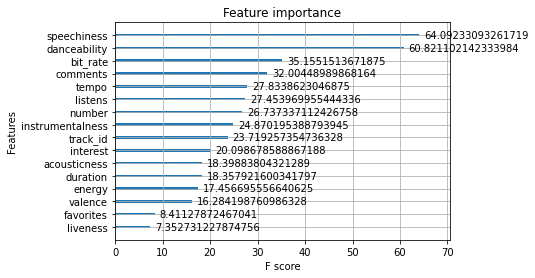

In [113]:
import shap
model = xgb.XGBClassifier()
model.fit(train_x,train_y)
xgb.plot_importance(model, importance_type="cover")
# we can see that track_id is important in classification. Very odd !!

In [114]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_x)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [116]:
shap.initjs()

In [117]:
shap.force_plot(explainer.expected_value, shap_values[0,:], test_x.iloc[0,:])

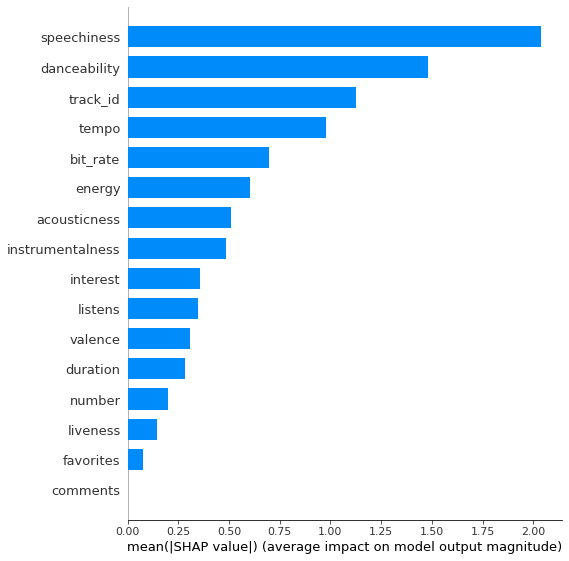

In [118]:
shap.summary_plot(shap_values, test_x, plot_type="bar")

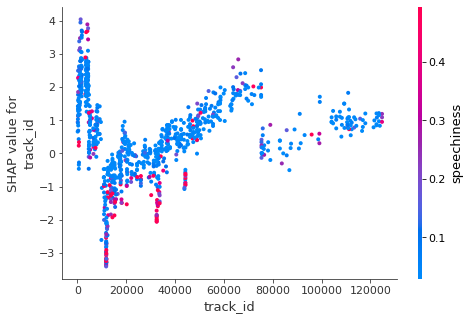

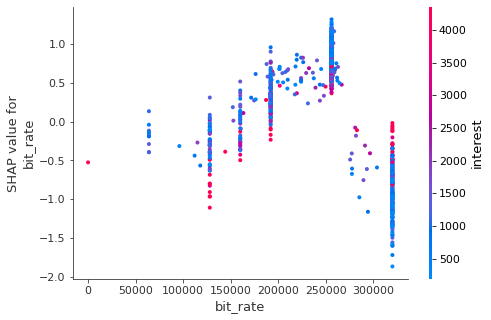

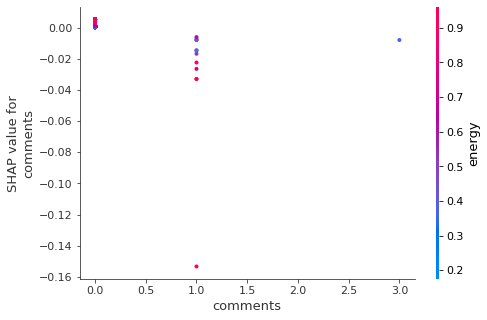

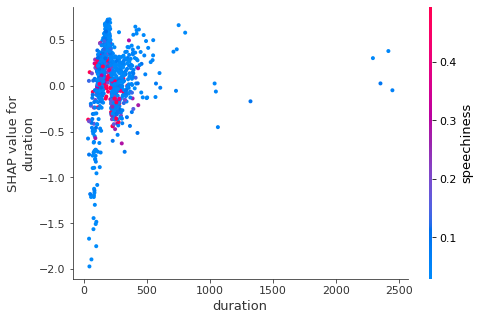

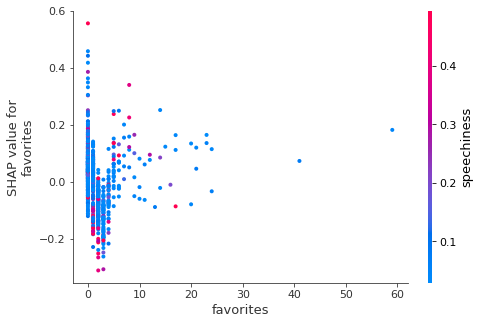

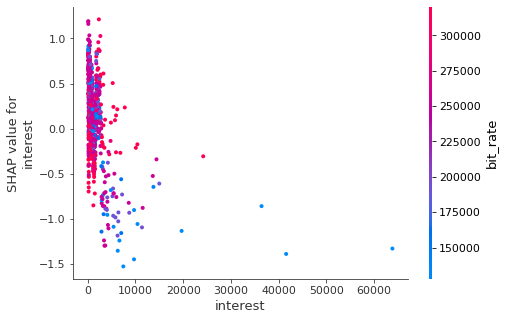

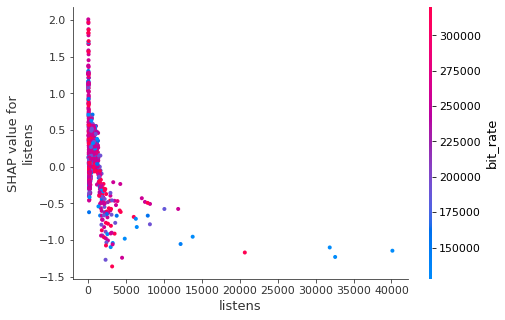

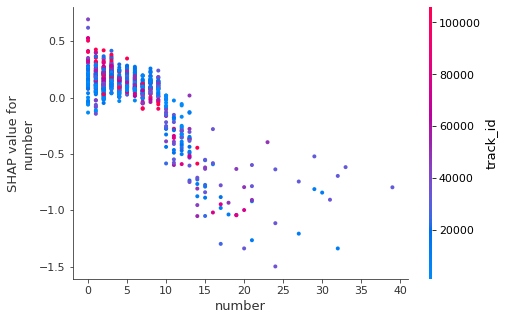

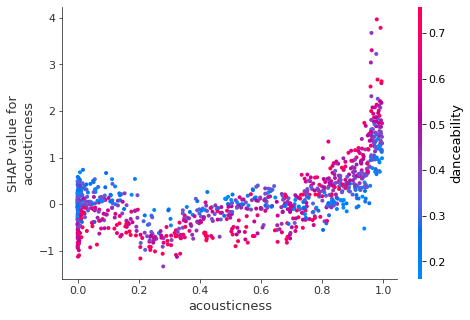

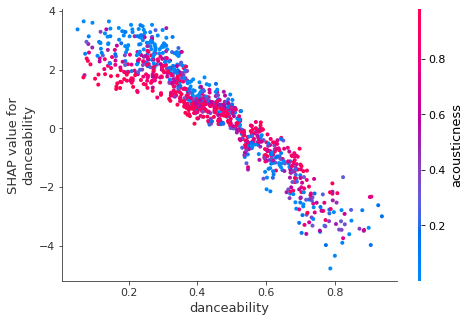

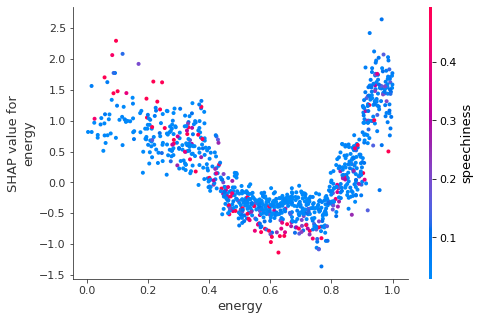

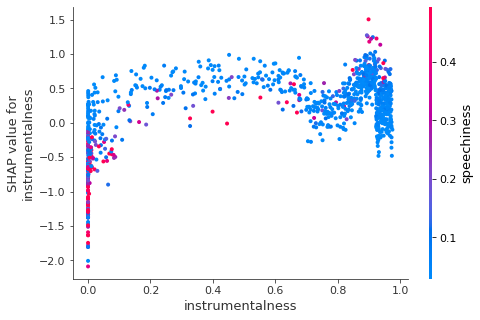

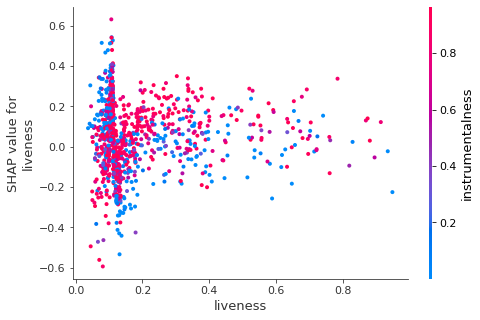

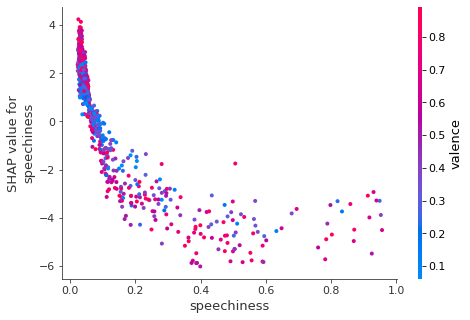

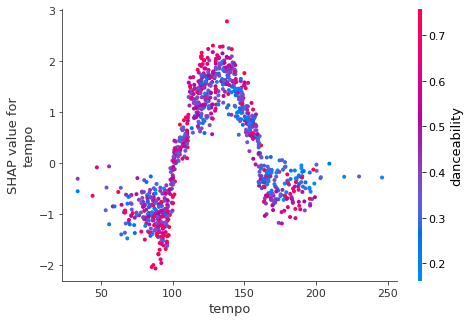

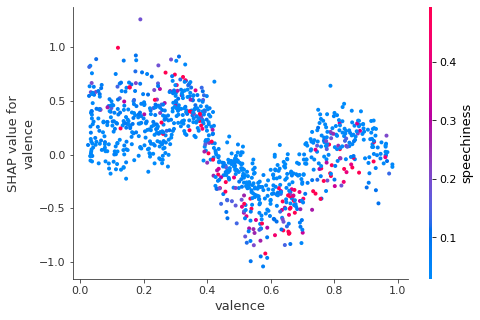

In [119]:
for name in test_x.columns:
    shap.dependence_plot(name, shap_values, test_x, display_features=test_x)

## Training a DT and Logistic regression model for comparison

In [143]:
from sklearn import tree
def train_tree(train_x,test_x,train_y,test_y):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train_x, train_y)
    scores = -1 * cross_val_score(clf, train_x, train_y,
                                    cv=5,
                                    scoring='neg_mean_absolute_error')
    print('average loss on 5 folds: ',scores.mean())
    clf.fit(train_x,train_y)
    print('accuracy on test data: ',clf.score(test_x,test_y)*100)
    y_pred = clf.predict(test_x)
    print(precision_recall_fscore_support(test_y, y_pred, average='binary'))
train_tree(train_x,test_x,train_y,test_y)

average loss on 5 folds:  0.10779048818812309
accuracy on test data:  89.59417273673257
(0.9304123711340206, 0.9401041666666666, 0.9352331606217615, None)


In [128]:
print(np.squeeze(train_y))

[0. 1. 1. ... 1. 0. 1.]


In [144]:
from sklearn.linear_model import LogisticRegression
def train_logistic(train_x,test_x,train_y,test_y):
    clf = LogisticRegression(max_iter=1000)
    clf = clf.fit(train_x, train_y)
    scores = -1 * cross_val_score(clf, train_x, np.squeeze(train_y),
                                    cv=5,
                                    scoring='neg_mean_absolute_error')
    print('average loss on 5 folds: ',scores.mean())
    clf.fit(train_x,train_y)
    print('accuracy on test data: ',clf.score(test_x,test_y)*100)
    y_pred = clf.predict(test_x)
    print(precision_recall_fscore_support(test_y, y_pred, average='binary'))
train_logistic(train_x_scaled,test_x_scaled,train_y,test_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


average loss on 5 folds:  0.11117251842219333
accuracy on test data:  89.59417273673257
(0.9103194103194103, 0.96484375, 0.9367888748419723, None)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


## Resampling the data

In [163]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
train_y_df = pd.DataFrame(train_y,columns=['genre_top'])
train_y_df.reset_index(drop=True, inplace=True)
train_x.reset_index(drop=True, inplace=True)
train_x_with_labels = pd.concat([train_x,train_y_df], axis = 1) 
df_majority = train_x_with_labels[(train_x_with_labels['genre_top']==1)] 
df_minority = train_x_with_labels[(train_x_with_labels['genre_top']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority.shape[1], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
train_x_upsampled = df_upsampled.drop('genre_top',axis = 1)
trainy_y_upsampled = df_upsampled.genre_top
# print(train_x_upsampled.isnull().sum())


In [164]:
train_tree(train_x_upsampled,test_x,trainy_y_upsampled,test_y)

average loss on 5 folds:  0.007640780533249622
accuracy on test data:  83.14255983350677
(0.8265086206896551, 0.9986979166666666, 0.9044811320754716, None)


In [165]:
train_logistic(train_x_upsampled,test_x,trainy_y_upsampled,test_y)

average loss on 5 folds:  0.006048930159083775
accuracy on test data:  79.91675338189386
(0.7991675338189386, 1.0, 0.8883747831116252, None)
